In [1]:
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pylab as plt
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error
from seqmml import SeqUD, GPEIOPT, SMACOPT, TPEOPT

# Example 1: SVM for Classification

In [2]:
sx = MinMaxScaler()
dt = datasets.load_breast_cancer()
x = sx.fit_transform(dt.data)
y = dt.target

ParaSpace = {'C':     {'Type': 'continuous', 'Range': [-6, 16], 'Wrapper': np.exp2}, 
             'gamma': {'Type': 'continuous', 'Range': [-16, 6], 'Wrapper': np.exp2}}

estimator = svm.SVC()
score_metric = make_scorer(accuracy_score, True)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

In [3]:
sequd_clf = SeqUD(ParaSpace, level_number = 20, max_runs = 100, max_search_iter = 100, n_jobs= 10, 
                 estimator = estimator, cv = cv, scoring = score_metric, refit = None, verbose = True)
sequd_clf.fit(x, y)

tpe_clf = TPEOPT(ParaSpace, max_runs = 100, estimator = estimator, cv = cv, scoring = score_metric, refit = True, verbose = True)
clf.fit(x, y)

smac_clf = SMACOPT(ParaSpace, max_runs = 100, estimator = estimator, cv = cv, scoring = score_metric, refit = True, verbose = True)
clf.fit(x, y)

gpei_clf = GPEIOPT(ParaSpace, max_runs = 100, estimator = estimator, cv = cv, scoring = score_metric, refit = True, verbose = True)
clf.fit(x, y)

Stage 1 completed (20/100) with best score: 0.97895.
Stage 2 completed (34/100) with best score: 0.97895.
Stage 3 completed (48/100) with best score: 0.97895.
Stage 4 completed (63/100) with best score: 0.98246.
Stage 5 completed (78/100) with best score: 0.98246.
Stage 6 completed (92/100) with best score: 0.98421.
Maximum number of runs reached, stop!
Search completed in 9.14 seconds.
The best score is: 0.98421.
The best configurations are:
C                   : 12.63519
gamma               : 1.08815


Search completed in 8.49 seconds.
The best score is: 0.98246.
The best configurations are:
C                   : 11.43717
gamma               : 1.09929



Search completed in 82.47 seconds.
The best score is: 0.97895.
The best configurations are:
C                   : 6.60025
gamma               : 0.14198



Search completed in 636.60 seconds.
The best score is: 0.98070.
The best configurations are:
C                   : 15.23092
gamma               : 0.76887



A contour plot based on a thorough grid search

In [4]:
def plot_trajectory(Z, clf, title):
    levels = [0.2, 0.4, 0.8, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
    cp = plt.contourf(X, Y, Z, levels)
    plt.colorbar(cp)
    plt.xlabel('C')
    plt.ylabel('gamma')
    plt.scatter(np.log2(clf.logs.loc[:,['C']]), 
                np.log2(clf.logs.loc[:,['gamma']]), color = "red")
    plt.title(title)

NameError: name 'sequd_clf' is not defined

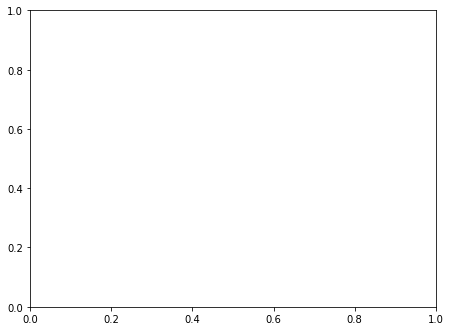

In [5]:
grid_num = 25
xlist = np.linspace(-6, 16, grid_num)
ylist = np.linspace(-16, 6, grid_num)
X, Y = np.meshgrid(xlist, ylist)
Z = np.zeros((grid_num,grid_num))
for i, C in enumerate(xlist):
    for j, gamma in enumerate(ylist):
        estimator = svm.SVC(C=2**C,gamma = 2**gamma)
        out = cross_val_score(estimator, x, y, cv = cv, scoring = score_metric)
        Z[j,i] = np.mean(out)
        
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plot_trajectory(Z, sequd_clf, "SeqUD")

plt.subplot(2,2,2)
plot_trajectory(Z, tpe_clf, "TPE")

plt.subplot(2,2,3)
plot_trajectory(Z, smac_clf, "SMAC")

plt.subplot(2,2,4)
plot_trajectory(Z, gpei_clf, "GPEI")

# Example 2: Xgboost for Regression

In [ ]:
dt = datasets.load_diabetes()
sx = MinMaxScaler()
sy = MinMaxScaler()
x = sx.fit_transform(dt.data)
y = sy.fit_transform(dt.target.reshape([-1,1]))

ParaSpace = {'booster':          {'Type': 'categorical', 'Mapping': ['gbtree', 'gblinear']},
             'max_depth':        {'Type': 'integer',     'Mapping': np.linspace(2,10,9)}, 
             'n_estimators':     {'Type': 'integer',     'Mapping': np.linspace(100,500,401)},
             'min_child_weight': {'Type': 'integer',     'Mapping': np.linspace(1,100,100)},
             'subsample':        {'Type': 'continuous',  'Range': [0, 1],  'Wrapper': lambda x:x},
             'colsample_bytree': {'Type': 'continuous',  'Range': [0, 1],  'Wrapper': lambda x:x},
             'learning_rate':    {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x},
             'gamma':            {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x},
             'reg_lambda':       {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x},
             'reg_alpha':         {'Type': 'continuous',  'Range': [-5, 0], 'Wrapper': lambda x: 10**x}}

estimator = xgb.XGBRegressor()
cv = KFold(n_splits=5, random_state=0, shuffle=True)

In [ ]:
sequd_clf = SeqUD(ParaSpace, level_number = 20, max_runs = 100, max_search_iter = 100, n_jobs= 10, 
                 estimator = estimator, cv = cv, refit = None, verbose = True)
sequd_clf.fit(x, y)

tpe_clf = TPEOPT(ParaSpace, max_runs = 100, estimator = estimator, cv = cv, refit = True, verbose = True)
clf.fit(x, y)

smac_clf = SMACOPT(ParaSpace, max_runs = 100, estimator = estimator, cv = cv, refit = True, verbose = True)
clf.fit(x, y)

gpei_clf = GPEIOPT(ParaSpace, max_runs = 100, estimator = estimator, cv = cv, refit = True, verbose = True)
clf.fit(x, y)

In [ ]:
plt.plot(gpei_clf.logs["score"].cummax()) 
plt.plot(smac_clf.logs["score"].cummax()) 
plt.plot(tpe_clf.logs["score"].cummax())
plt.plot(sequd_clf.logs["score"].cummax()) 
plt.legend(['GPEI', 'SMAC', 'TPE', 'SeqUD'])

 # Example 3: Kmeans for Unsupervised Clustering  

In [ ]:
sx = MinMaxScaler()
dt = datasets.load_iris()
x = sx.fit_transform(dt.data)
y = dt.target.reshape([-1,1])

ParaSpace = {'n_clusters':  {'Type': 'integer',    'Mapping': np.linspace(2,9,8)}, 
             'tol':         {'Type': 'continuous', 'Range': [-6, -3], 'Wrapper': lambda x: 10**x}}
estimator = KMeans()
cv = KFold(n_splits=5, random_state=0, shuffle=True)

In [ ]:
sequd_clf = SeqUD(ParaSpace, level_number = 20, max_runs = 100, max_search_iter = 100, n_jobs= 10, 
                 estimator = estimator, cv = cv, refit = None, verbose = True)
sequd_clf.fit(x)

tpe_clf = TPEOPT(ParaSpace, max_runs = 100, estimator = estimator, cv = cv, refit = True, verbose = True)
clf.fit(x)

smac_clf = SMACOPT(ParaSpace, max_runs = 100, estimator = estimator, cv = cv, refit = True, verbose = True)
clf.fit(x)

gpei_clf = GPEIOPT(ParaSpace, max_runs = 100, estimator = estimator, cv = cv, refit = True, verbose = True)
clf.fit(x)

In [ ]:
plt.plot(gpei_clf.logs["score"].cummax()) 
plt.plot(smac_clf.logs["score"].cummax()) 
plt.plot(tpe_clf.logs["score"].cummax())
plt.plot(sequd_clf.logs["score"].cummax()) 
plt.legend(['GPEI', 'SMAC', 'TPE', 'SeqUD'])